<a href="https://colab.research.google.com/github/catherineHZN/DeepLearningTutorials/blob/main/TensorFlow/01_RegressionNN_in_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with Neural networks in TensorFlow



In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.1


## Creating some data to view and fit

Here, we are using some synthetically created data. In normal applications, data come from a real-world information gathered from all sorts of places. This way the data actually describes the reality that we are trying to learn.

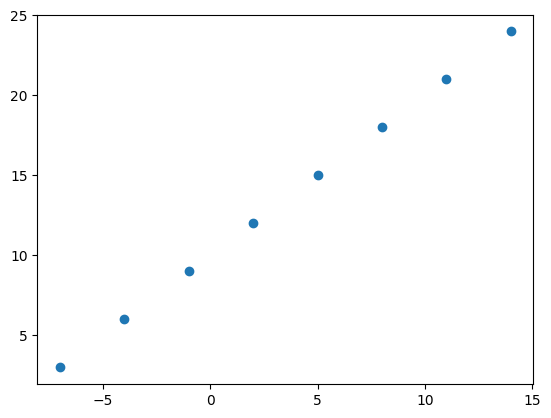

In [2]:
import numpy as np
# matplotlib.pyplot this library is required for plotting our data and the learned
# in a graph ...
import matplotlib.pyplot as plt

# Again,for the sake of learning the concept, we are generating a very small data set manually.
# In real life, this data should be much bugger, and acquired from some sort of real life information
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create the lables
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulaize our great dataset!! for this sake, we need the matplotlib.pyplot library
# plt.scatter will just plot the X and y as scttered dot on the axis.
plt.scatter(X,y)


In [3]:

# Actually y= X+10 ois the model that we are trying to learn!!
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn our NumPy array into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

# Steps in modeling with TensorFlow
##1. Creating the model:
1.1 Define the input and output layers

1.2 Define the hidden layers of the deep learning model.
##2. Compiling the model
2.1 Define the loss function (in other words, the function which tells our model how wrong it is) for example: SGD, Adam.

2.2 Define the optimizers (tells the model how to improve the patterns its learning)

2.3  Define the  evaluation metrics (what we can use to interpret the preformance of the model)

##3. Fitting the mode:

Letting the model try to find patterns between X and y.

In [8]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1)
])

#2. Compile the model
# tf.keras.losses.mae is mean absolute error

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.0981 - mae: 9.0981   
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 8.9656 - mae: 8.9656
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 8.8331 - mae: 8.8331
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.7006 - mae: 8.7006
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.5681 - mae: 8.5681
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.4356 - mae: 8.4356
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.3031 - mae: 8.3031
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.1706 - mae: 8.1706
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 8.0381 - mae: 8.0381
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 7.9056 - mae: 7.9056


In [9]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
# Try and predict using our model
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


array([[27.430634]], dtype=float32)

## Improving our model
We can improve the model by altering the steps we took to create/compile/fit our model
### 1.**Creating a model**

1.1 Consider adding more layers

1.2 Increase the number of hiddwn layers

1.3 Change the activiation function in each layer.

###2.**Compiling the model**

2.1 Changing the learning rate of the optimization. **The learning rate** is one of the most common ways to improve the performance of the model. Try to tweek it first!

2.2 Changing the optimizer

##3.**Fitting the model**

3.1 Fit the model for more **epochs**

3.2 Feed the model with more data!!

In [11]:
# Creat/Compile and fit a larger model
# First expirement - changing the epoch number from 5 to 100

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),loss = tf.keras.losses.mae, metrics=["mae"])


# 3. fitting the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step - loss: 13.3550 - mae: 13.3550
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 13.2225 - mae: 13.2225
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 13.0900 - mae: 13.0900
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 12.9575 - mae: 12.9575
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - loss: 12.8250 - mae: 12.8250
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 12.6925 - mae: 12.6925
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 12.5600 - mae: 12.5600
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 12.4275 - mae: 12.4275
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 12.2950 - mae: 12.2950
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 12.1625 - mae: 12.1625
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 12.0300 - mae: 12.0300
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 11.8975 - mae: 11.8975
Epoch 13/100
1

In [12]:
model.predict(tf.expand_dims([11.0], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[19.418085]], dtype=float32)

In [13]:
# Let's see if we can change the model so we can improve the performance
# 1. Create the model archeticture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1) ])

#2. Copmile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01) , loss = tf.keras.losses.mae, metrics=["mae"])


#3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs= 100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.2211 - mae: 13.2211
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.3414 - mae: 12.3414
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.4925 - mae: 11.4925
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 10.8720 - mae: 10.8720
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.2367 - mae: 10.2367
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.5916 - mae: 9.5916
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.9414 - mae: 8.9414
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.2808 - mae: 8.2808
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.5998 - mae: 7.5998
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 6.8982 - mae: 6.8982
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 6.1784 - mae: 6.1784
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5.4321 - mae: 5.4321
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [14]:
model.predict(tf.expand_dims([17.0], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[27.454548]], dtype=float32)

## Evaluating the model

In practice, a typical workflow you'll go through whem building neural networks is:

```
Build model -> compile the model -> fit model -> evaluate it -> tweak the model fit it -> evaluate -> tweak -> fit -> evaluate -> tweak ...
```
When it comes to evaluation.. there are three words you should memorize:

Visualize, visualize, visualize!!!!!

It's a good idea to visualize:

* The data -  what data are working on? what does it look like?
* The model itself: what does our model look like?
* The training of a model : how does the model performs while learning?
* The predictions of the model -  how do the predictions of a model line up against the ground truth (the original labels)?

## Common ways to improve a deep model:


1.   Adding layers - i.e making the model deeper
2.   Increase the  number of hidden units - the number of neurons in each or some of the layers
3.   Change the activation functions
4.   Change the optimization function (SGD, ADAM, ...)
5.   Change the learning rate in the optimization process - **one of the common ways to improve learning!!**
6. Fitting on **more data!!** -  data is the most important player in this process.. add data if you can!!
7. Fittiing for longer - increase the number of epochs the model passing over the training set.


In [15]:
# Lets'get the data set bigger ..

#import tensorflow as tf
X = tf.range(-100, 100, delta=4 )
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [17]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.6645 - mae: 5.6645
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.5039 - mae: 3.5039
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6265 - mae: 2.6265  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8352 - mae: 2.8352  
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0816 - mae: 2.0816 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7271 - mae: 1.7271
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.7449 - mae: 1.7449 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8927 - mae: 1.8927 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.2037 - mae: 2.2037
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2703 - mae: 1.2703 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8088 - mae: 0.8088
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9212 - mae: 0.9212
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11m

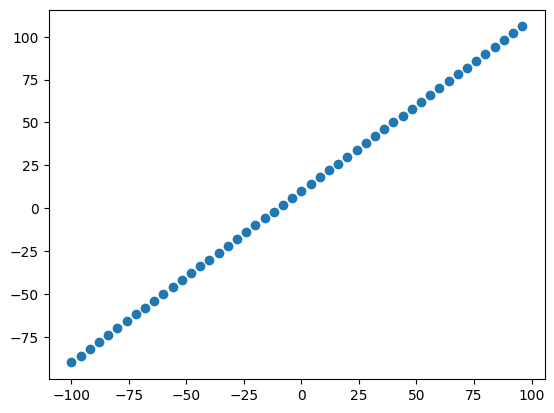

In [18]:
# Visualize the data
# We use the matplotlib.pyplot library to draw graphs that can visualize the data

import matplotlib.pyplot as plt
#plt.plot(X,y)
plt.scatter(X,y)



### The three sets concept ...

* **Training set **- the model learns from this data, which is typically 70-80% of the data
* **Validation set** bold text -  the model gets tuned on this data, this is a data the model didnt see before, this is typically 10-15% of the data.
* **Test set** -  the model gets ecaluated on this data to test what it has learned, this set is typically 10-15%.

**Note:**  when you are dealing with a dataset that contains Millions of data entries, the portion allocated to Validation and test can be as small as 1.5% of the data.


### Generalization : the ability for a machine learning model to perform well on data that it has not seen before. Hence, the three set method is very important to make the model generalize!

In [19]:
# Chack the length of how many data points we have in the dataset
len(X)


50

In [20]:
# Split the data into train and test tests
# Since out dataset is small, we will use train / test data only
# we split in 80/20
X_train =X[:40]
y_train = y[:40]
X_test = X[40: ]
y_test = y[40: ]
len(X_train) , len(X_test)

(40, 10)

###Visualize the data
Now we've got our data splitted. Let's visualize it

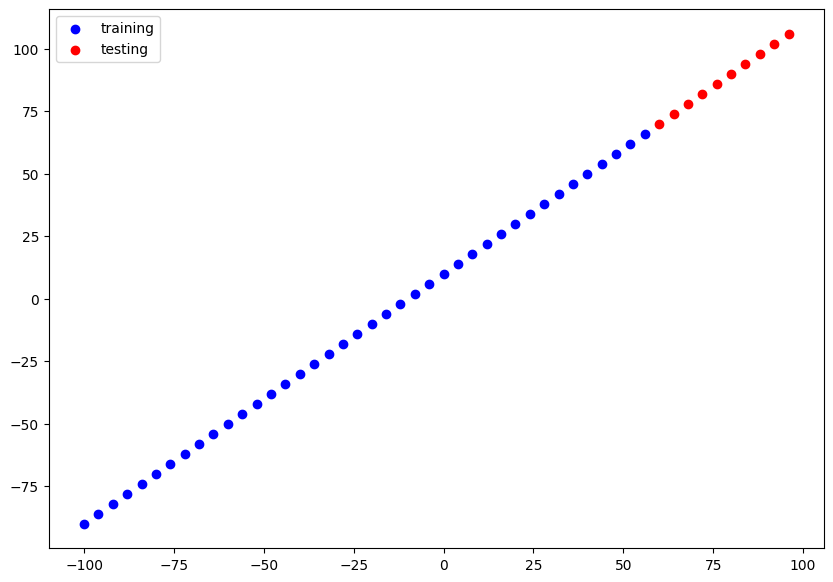

In [21]:
# Again we use matplotlib for plotting a graph

plt.figure(figsize= (10,7))

# plot training data in blue
plt.scatter(X_train, y_train, c='blue', label = "training")
plt.scatter(X_test, y_test, c='red', label = "testing")
plt.legend()

In [22]:
#Let's create a new NN for the new data
#Surely, we could have fitted the original model that we built earlier to the new Data..
#But just for the practice.. we will create a new one, and we will start with the simple
# version of our original model!!



# 1. Create a model using the sequential API
# Notice that the creation of the model with Dense = 1 means that we are creating
# a NN that contains a single input and a single output. And the archeticture of the network
# is just a simple neuron (this is a single input , single output  perceptron network)
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1)
])

#2. Compile the model
# tf.keras.losses.mae is mean absolute error

model.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(),metrics=["mae"])






###Visualizing the model

In [23]:
# Now we want to see what does the model look like...
# To do that we can use `model.summary()`
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Note** that the output shape is not defined yet and therefore, we got a "?" under the outputshape entry.
Also the Param  is 0(unbuilt)  - that is beacuse we did not build our model yet by calling build/fit method!

In [24]:
# Now, we can run fit and the output shape will be calculated aoutomatically..
# Or we can specify the output shape while creating the model!

# Let's create a model which builds automatically by defining the input shape argument

tf.random.set_seed(42)

# 1. Create a model
model=tf.keras.Sequential( name="Regression_model")
model.add(tf.keras.Input(shape=[1]))
model.add(tf.keras.layers.Dense(1, name="output"))



#2. compile the model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])





In [25]:
model.summary()

Model: "Regression_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ output (Dense)                       │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters
* Trainable parameters: these are the parameters (patterns) that the model can update.
* Non-trainable parameters: these parameters aren't updated during the learning proces. In transfer learning when some of the parameters are imported from a pretrained model.

**Resource** For more in depth overview on the trainable params chack MIT's introduction to Deep Learning Video.  

In [26]:
model.fit(tf.expand_dims(X_train, axis =-1 ), y_train, epochs= 100, verbose = 0)

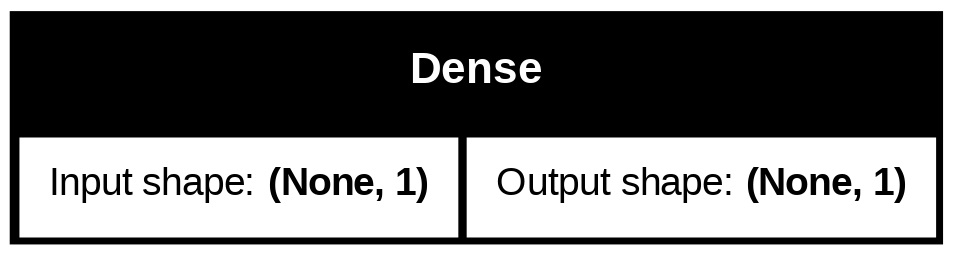

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

Visualizing prediction  is often done by ploting them against theground truth labels. To do so, we predict the labels of X_test  into y_pred. and then Visualize the predition y_pred against the ground truth y_test.


In [28]:
# Make the prediction

y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [29]:
y_pred

array([[49.652412],
       [52.8687  ],
       [56.084984],
       [59.30127 ],
       [62.517555],
       [65.73384 ],
       [68.95013 ],
       [72.16641 ],
       [75.3827  ],
       [78.59898 ]], dtype=float32)

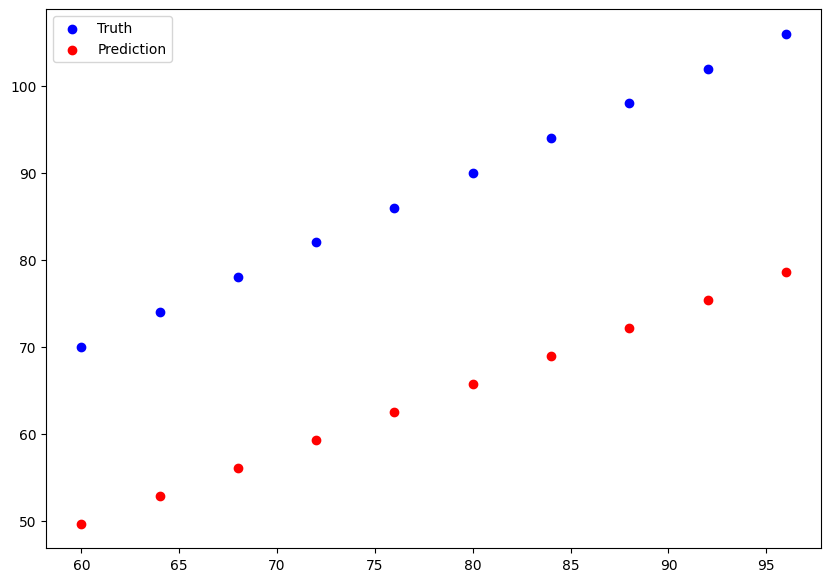

In [30]:
plt.figure(figsize= (10,7))

# plot training data in blue
plt.scatter(X_test, y_test, c='blue', label = "Truth")
plt.scatter(X_test, y_pred, c='red', label = "Prediction")
plt.legend()

In [83]:
# Let's create a ploting function
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data = X_test,
                    test_labes = y_test,
                    predictions = y_pred):
  plt.figure(figsize= (10,7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='blue', label = "Truth")
  plt.scatter(test_data, test_labes, c='green', label = "Prediction")

 # plt.scatter(X_test, y_test, c='red', label = "Truth")
  plt.scatter(test_data, predictions, c='red', label = "Prediction")


  plt.legend()


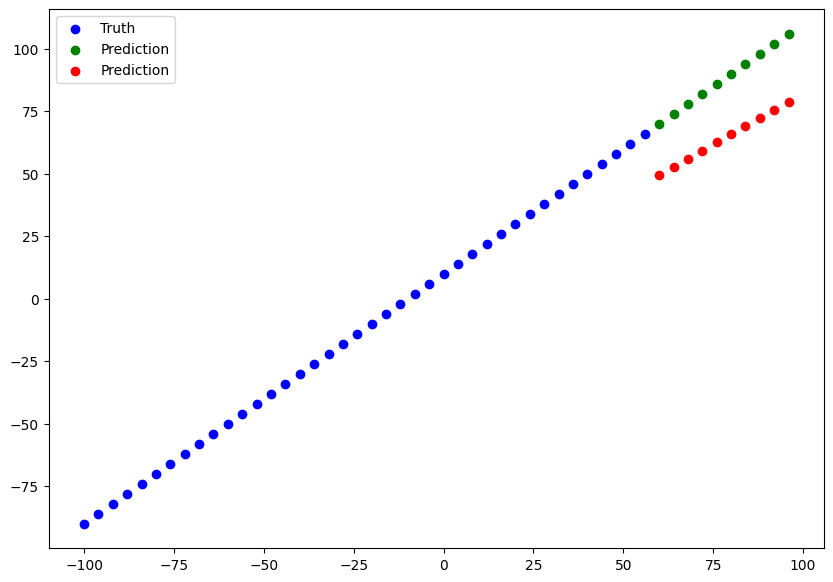

In [32]:
plot_prediction(X_train, y_train, X_test, y_test, y_pred)

### Evaluating our model's predictions with regression evaluation metrics

There are different ways to evaluate a model depending on the type of the learning model:

**Regression:** There are two main metrics:
* **MAE** - mean absoulte error. That is on average how wrong is each of my models's predictions: (1/n)Σ|y_i -ŷ_i|

* MAE is useful as a great starter metric for any regression problem.
* ``tf.keras.losses.MAE()``  OR ``tf.metrics.mean_absolute_error()``

* **MSE** - which measures the average squared magnitude of the errors: (1/n)Σ(y_i -ŷ_i)^2
* MSE is useful when larger errors are more significant the smaller errors.
* ``tf.keras.losses.MSE()`` OR ``tf.metrics.mean_square_error()``

* **Huber** error: this is a combination of MSE and MAE. Less sensetive to outliars than MSE. check the equation online.
* ``tf.keras.losses.Huber()``

**Other metrics that we will see later for other models**:
* **RMSE** - Root Mean Squared Error (RMSE), which measures the square root of the average squared magnitude of the errors.   
* **RMSLE**: Root Mean Squared Logarithmic Error (RMSLE), which measures the square root of the average squared logarithmic difference between the predicted values and the actual values.

In [33]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 23.8743 - mae: 23.8743


[23.87430191040039, 23.87430191040039]

### According to what metric does the evaluate function works?
Well, when we compiled the mode, we specified a metric

``model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])``

This means, that the evaluate method will calculate the MAE error because this is what we asked for in the compilation prcess.

###What if we wanted to calcuate the error according to a different metric?
Let's do that!!

In [34]:
y_pred.shape, y_test.shape


((10, 1), TensorShape([10]))

In [35]:
y_pred = tf.constant(y_pred)


In [36]:
# to make any comparison between tensors we need those to be in the same shape.
tf.squeeze(y_pred)


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([49.652412, 52.8687  , 56.084984, 59.30127 , 62.517555, 65.73384 ,
       68.95013 , 72.16641 , 75.3827  , 78.59898 ], dtype=float32)>

In [37]:
# Calculate the MSE using the prediction y_pred
mae = tf.keras.losses.MAE(y_true = y_test, y_pred=tf.squeeze(y_pred))

In [38]:
tf.keras.losses.MSE(y_true = y_test, y_pred= tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=575.04956>

In [48]:
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mse(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [49]:
maeold = mae(y_true= y_test, y_pred=y_pred)
maeold

<tf.Tensor: shape=(), dtype=float32, numpy=23.874302>

In [50]:
mseold = mse(y_true= y_test, y_pred=y_pred)
mseold

<tf.Tensor: shape=(), dtype=float32, numpy=575.04956>

### Running expirements to improve our model!!

```
Building model -> fit it -> evalue -> tweak -> fit -> evaluate -> tweak -> fit -> evaluate ...

```
Let's start with tweaking!!

Top three ways to tweak the model


Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**



In [42]:
# Model_1

tf.random.set_seed(42)

# 1. Create a model_1
model_1=tf.keras.Sequential( name="model_1")
model_1.add(tf.keras.Input(shape=[1]))
model_1.add(tf.keras.layers.Dense(1, name="output"))

#2. compile the model
#model_1.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
model_1.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics = ["mae"])

#3. fit the model
model_1.fit(tf.expand_dims(X_train, axis =-1 ), y_train, epochs= 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.3205 - mae: 9.3205 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.8415 - mae: 10.8415 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.3318 - mae: 10.3318 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.1350 - mae: 12.1350
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.5553 - mae: 12.5553 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0172 - mae: 8.0172 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7230 - mae: 9.7230 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9993 - mae: 7.9993 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7114 - mae: 9.7114 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9815 - mae: 7.9815 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6998 - mae: 9.6998 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9636 - mae: 7.9636 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


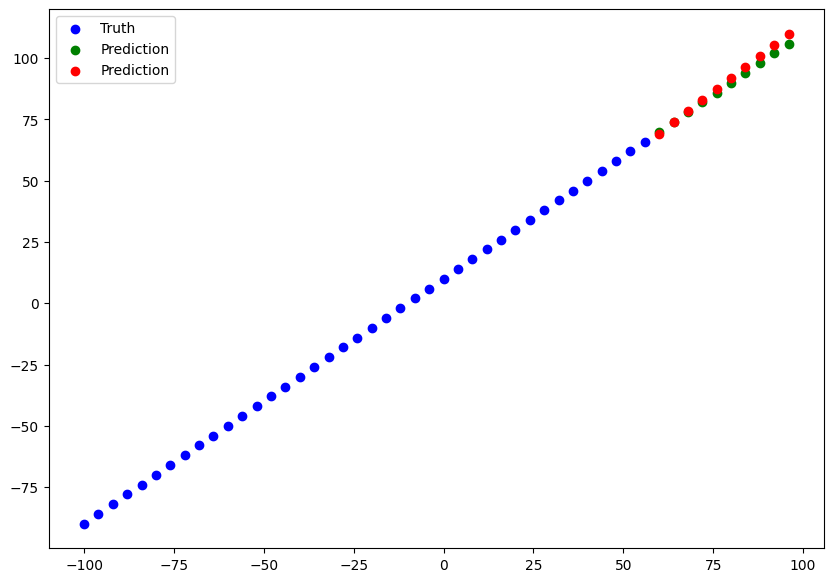

In [84]:
# Make and plot predictions for model_1, we do on the test data

y_preds_1 = model_1.predict(X_test)
plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data = X_test,
                    test_labes = y_test,
                    predictions = y_preds_1)

In [44]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 69.26353 ],
        [ 73.78655 ],
        [ 78.30958 ],
        [ 82.8326  ],
        [ 87.35563 ],
        [ 91.878654],
        [ 96.40169 ],
        [100.92471 ],
        [105.44774 ],
        [109.970764]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.26353 ,  73.78655 ,  78.30958 ,  82.8326  ,  87.35563 ,
         91.878654,  96.40169 , 100.92471 , 105.44774 , 109.970764],
       dtype=float32)>)

In [51]:
# Calculate model_1 evaluation metrics
mae_1=mae(y_test, y_preds_1)
mse_1=mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.8071289>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.872001>)

In [85]:
# Model_2
tf.random.set_seed(42)
# 1. Create a model_2
model_2=tf.keras.Sequential([tf.keras.layers.Dense(1,name = "m2_hidden1"),
                             tf.keras.layers.Dense(1,name = "m2_out1")]
                            )


#2. compile the model
model_2.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])


#3. fit the model
model_2.fit(tf.expand_dims(X_train, axis =-1 ), y_train, epochs= 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 40.3529 - mae: 40.3529 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6571 - mae: 11.6571 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.6994 - mae: 12.6994 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.3772 - mae: 14.3772 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5241 - mae: 11.5241 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.5631 - mae: 12.5631 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.2246 - mae: 14.2246 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.4052 - mae: 11.4052 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.4473 - mae: 12.4473 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.8667 - mae: 13.8667 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.9203 - mae: 12.9203 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.2983 - mae: 15.2983 
Epoch 13/100
2/2 ━━━━━━━

In [88]:
y_preds_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


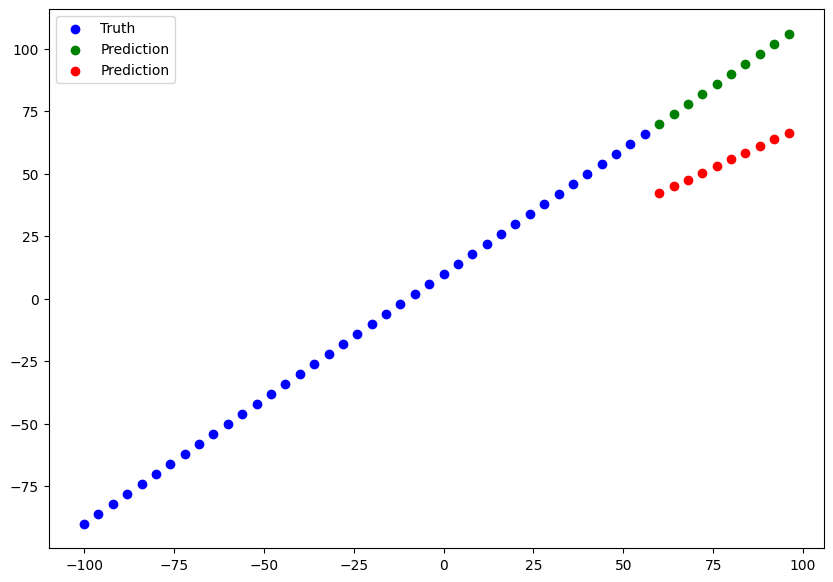

In [90]:
plot_prediction(predictions=y_preds_2)

In [91]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=33.60187>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1143.3512>)

In [98]:
# Model_3
tf.random.set_seed(42)
# 1. Create a model_2
model_3=tf.keras.Sequential([tf.keras.layers.Dense(10) ,
                             tf.keras.layers.Dense(1)],
                            name="model_3")



#2. compile the model
model_3.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])


#3. fit the model
model_3.fit(tf.expand_dims(X_train, axis =-1 ), y_train, epochs= 500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 41.0438 - mae: 41.0438
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.9320 - mae: 26.9320  
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 24.6482 - mae: 24.6482
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.7165 - mae: 14.7165 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.8097 - mae: 18.8097
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.8951 - mae: 12.8951 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8135 - mae: 14.8135 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.4838 - mae: 15.4838 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.2608 - mae: 11.2608
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.1111 - mae: 15.1111
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.1148 - mae: 11.1148 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.9646 - mae: 14.9646 
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


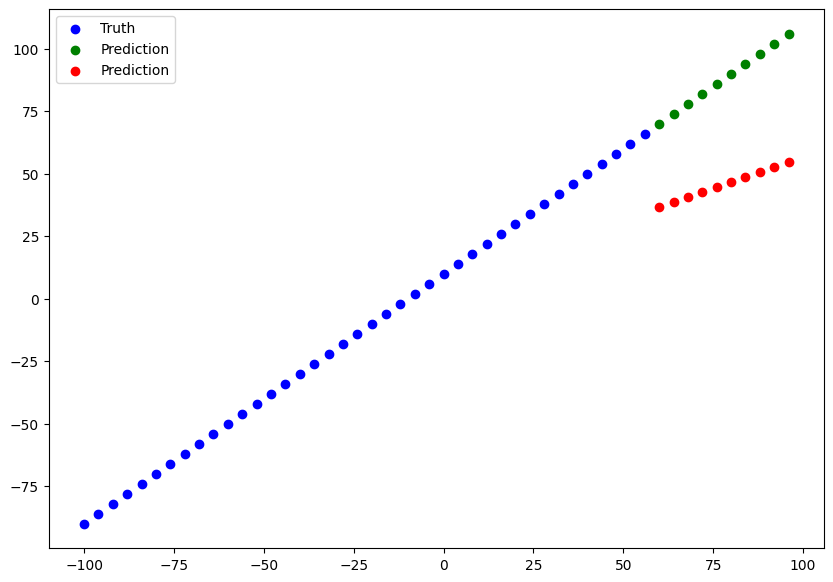

In [99]:
y_preds_3 = model_3.predict(X_test)
plot_prediction(predictions=y_preds_3)

### Comparing results of each expirements